In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [49]:
poll_data = pd.read_csv(
    "../../data/mlcourse_open_first_survey_parsed.csv", index_col="id"
)

In [50]:
poll_data.head(100)

,Timestamp,Представьтесь в 2-3 фразах,Работали ли Вы с Jupyter notebooks?,Что Вы ждете от курса?,Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?,"Ладно, посерьезней: согласны ли Вы на обработку персональных данных?","Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)","Чему равна дисперсия равномерного на [0,6] распределения?","Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]",Сколько параметров у нормального распределения?,Сможете написать на Python генератор чисел Фибоначчи?,"Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro",Оцените свой уровень владения GitHub,"Посоветуйте хороший фильм в стиле ""Игра в имитацию"" :)"
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN
2,2016/12/05 10:47:07 am GMT+3,"Я Software Engeneer разработчик, активно интер...",Да,Побольше практики на реальных данных (задачах).,basketball,Да,3,3,NaN,2.0,Да,Да,Проф,NaN
3,2016/12/05 10:47:22 am GMT+3,Семилетний инженер. Специализируюсь в компьюте...,Да,Глубокого разбора алгоритмов и инструментов.,NaN,Да,3,0.5,-12,2.0,Да,Да,"Пользуюсь ветками, могу что-то смерджить",Король говорит
5,2016/12/05 10:58:34 am GMT+3,программист. pl/sql python,Да,Упорядочить знания,футбол,Да,3,3,-12,2.0,Да,уже знаю,"Пользуюсь ветками, могу что-то смерджить",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2016/12/06 2:46:40 pm GMT+3,"Выпускница МФТИ, работаю аналитиком в Яндексе ...",Да,"Побольше практики, интересных задач и networki...",Биатлон,Да,4,3,-12,2.0,Да,Да,"Пользуюсь ветками, могу что-то смерджить",Игры разума
101,2016/12/06 4:20:05 pm GMT+3,Макроэкономист в крупном банке,Нет,Хочу изучить формальный мат.аппарат машинного ...,Триатлон,Да,4,3,-12,2.0,Нет,Да,Могу редактировать свою копию,NaN
102,2016/12/06 4:52:15 pm GMT+3,Студент 1 курса ФКН ВШЭ. Интересуюсь ML пример...,Да,"Много практики, много новых знакомств, много н...",Программирование вслепую,Да,3,NaN,-12,2.0,Да,Да,Могу редактировать свою копию,NaN


In [51]:
poll_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 0 to 3215
Data columns (total 14 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                    --------------  -----  
 0   Timestamp                                                                                                                                 2944 non-null   object 
 1   Представьтесь в 2-3 фразах                                                                                                                2944 non-null   object 
 2   Работали ли Вы с Jupyter notebooks?                                                                                                       2931 non-null   object 
 3   Что Вы ждете от курса?                               

In [52]:
poll_data.shape

(2944, 14)

**Переименуем признаки.**

In [53]:
rename_dic = dict(
    zip(
        poll_data.columns,
        [
            "time",
            "intro",
            "jupyter",
            "expect",
            "sport",
            "personal",
            "math_level",
            "quest1",
            "quest2",
            "quest3",
            "fib_gen",
            "python",
            "github",
            "movie",
        ],
    )
)

In [54]:
poll_data.rename(columns=rename_dic, inplace=True)

In [55]:
poll_data.head(2)

,time,intro,jupyter,expect,sport,personal,math_level,quest1,quest2,quest3,fib_gen,python,github,movie
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN


In [56]:
poll_data["jupyter"].value_counts().head()

Да             2071
Нет             766
немного           7
Немного           3
Да, но мало       2
Name: jupyter, dtype: int64

In [57]:
jupyer_levels = poll_data["jupyter"].map({"Да": 1, "Нет": 0}).fillna(2)

In [58]:
jupyer_levels.head()

id
0    1.0
1    1.0
2    1.0
3    1.0
5    1.0
Name: jupyter, dtype: float64

c:\program files\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


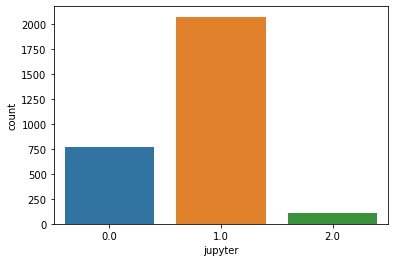

In [59]:
sns.countplot(jupyer_levels);

In [60]:
poll_data.columns

Index(['time', 'intro', 'jupyter', 'expect', 'sport', 'personal', 'math_level',
       'quest1', 'quest2', 'quest3', 'fib_gen', 'python', 'github', 'movie'],
      dtype='object')

In [61]:
poll_data.sport.value_counts().head()

Футбол       197
Баскетбол    113
футбол       113
Плавание      94
Хоккей        66
Name: sport, dtype: int64

**Процент ответивших на 3 вопрос**

In [62]:
(poll_data["quest3"] == 2).dropna().sum() / poll_data["quest3"][
    ~poll_data["quest3"].isnull()
].shape[0]

0.9244036697247706

**Ищем топ-10 слов в представлении себя. При этом уберем стоп-слова**

In [63]:
all_words = np.concatenate(poll_data["intro"].apply(lambda s: s.strip().split()).values)

In [64]:
len(all_words)

26533

In [65]:
import nltk

ModuleNotFoundError: No module named 'nltk'

In [ ]:
nltk.download("stopwords")

In [ ]:
nltk.corpus.stopwords.words("russian")[:10]

In [ ]:
words_series = pd.Series(list(all_words))
words_series[
    ~words_series.isin(nltk.corpus.stopwords.words("russian"))
].value_counts().head(10)